# ITMAL Exercise


## Performance Metrics

There are a number of frequently uses metrics in ML, namely accuracy, precision, recall and the $F_1$ score. All are called _metrics_ (though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time).

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  

You can find a lot of details on say precision and recall in Wikipedia

>  https://en.wikipedia.org/wiki/Precision_and_recall


### Nomenclature

| NAME | SYMBOL | ALIAS |
| :---: | :---: | :---: |
|true positives | $TP$ | |
|true negatives | $TN$ | |
|false positives| $FP$ | type I error| 
|false negatives| $FN$ | type II error |

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

### Precision

$$
\def\by{\mathbf{y}}
\def\ba{\begin{array}{lll}}
\def\ea{\end{array}}
\newcommand{\rem}[1]{}
\newcommand\st[1]{_{\scriptsize #1}}
\newcommand\myfrac[2]{\frac{#1\rule{0pt}{8pt}}{#2\rule{0pt}{8pt}}} 
\ba
 p &= \myfrac{TP}{TP + FP}
\ea
$$

### Recall or Sensitivity

$$
  \ba
    r &= \myfrac{TP}{TP + FN}\\
      &= \myfrac{TP}{N_P}
  \ea
$$

### Accuracy

$$
  \ba
      a &= \myfrac{TP + TN}{TP + TN + FP + FN}\\
        &= \myfrac{TP + TN}{N}\\
        &= \myfrac{TP + TN}{N_P~~ + N_N} 
  \ea
$$

#### Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weights could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

### F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \myfrac{pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ba
    F_1 &= \myfrac{2pr}{p+r}\\
        &= \myfrac{2}{1/p + 1/r}
  \ea
$$
with $F$ typically being synonymous with $F_1$. 

If needed, find more info on Wikipedia

> https://en.wikipedia.org/wiki/F1_score


## Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
{\bf M}\st{confusion} = 
\begin{array}{l|ll}
                           & \mbox{actual true} & \mbox{actual false} \\ \hline
    \mbox{predicted true}  & TP & FP \\     
    \mbox{predicted false} & FN & TN 
\end{array}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

Also notice, that the layout of this matrix is different of what is given in [HOML], "Confusion Matrix", p.92/fig 3-2. This is just a minor issue, since we can always flip/rotate/transpose the matrix (say by flipping the $\by\st{true}$ and $\by\st{pred}$ arguments). 

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
{\bf M}\st{confusion}~~~ =
  \left[
  \begin{array}{llll}
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
  \end{array}
  \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="https://itundervisning.ase.au.dk/GITMAL/L02/Figs/performance_metrics.jpg" alt="WARNING: you need to be logged into Blackboard to view images" style="width:900px">

If you need more info on the confusion matrix:

>  https://en.wikipedia.org/wiki/Confusion_matrix

#### Qa Implement the Accuracy function and test it on the MNIST data.

We now follow the convention in Scikit-learn, that a score funtion takes the arguments `y_true` and then `y_pred`

```
    sklearn.metrics.accuracy_score(y_true, y_pred, ..)
```

Implement a general accuracy function `MyAccuracy(y_true, y_pred)`. Again, implement the function you self from scratch, i.e. do not use any helper functions from Scikit-learn (implementing via `sklearn.metrics.confusion_matrix` is also not allowed, othewise you will then learn nothing!)

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOML]).

Compare your accuracy score with the acutal value from `sklearn.metrics.accuracy_score()`.

(Implementation note: what do you do, if the denominator is zero?)

In [2]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
def MNIST_GetDataSet():
    X, y = fetch_openml('mnist_784', cache=True, return_X_y=True, as_frame=False)
    return X, y

X, y = MNIST_GetDataSet()

In [3]:
import matplotlib
import matplotlib.pyplot as plt
def MNIST_PlotDigit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap=matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

In [4]:
# TODO: Qa...
from sklearn.metrics import accuracy_score
def MyAccuracy(y_true, y_pred):
    T = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            T += 1
    accuracy = (T)/len(y_true)
        
    return accuracy
    # TODO: you impl here
    assert False, "TODO: solve Qa, and remove me.."

    
#TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestAccuracy(y_true, y_pred):
   a0=MyAccuracy(y_true, y_pred)
   a1=accuracy_score(y_true, y_pred)

   print(f"\nmy a          ={a0}")
   print(f"scikit-learn a={a1}")

   # do some numerical comparison here, like
   #  if fabs(a0-a1)<eps then ..

X.shape=(70000, 784)
y.shape=(70000,)
[False]

my a          =0.9492
scikit-learn a=0.9492

my a          =0.8800448430493274
scikit-learn a=0.8800448430493274

my a          =0.6618887015177066
scikit-learn a=0.6618887015177066

my a          =0.7555341674687199
scikit-learn a=0.75553416746872


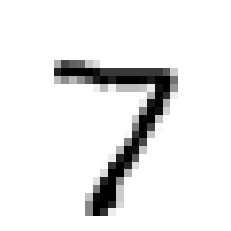

In [23]:
from sklearn.linear_model import SGDClassifier
from sklearn.base import clone
import numpy as np
print(f"X.shape={X.shape}")
print(f"y.shape={y.shape}")

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train_5 = (y_train=="5")
y_test_5 = (y_test=="5")
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
MNIST_PlotDigit(X_test[0])
print(f'{sgd_clf.predict([X_test[0]])}')
X_pred = np.empty(10000, dtype=bool)
y_true = np.empty(10000, dtype=bool)

for i in range(len(y_true)-1):
    X_pred[i] = sgd_clf.predict([X_test[i]])
    y_true[i] = y_test_5[i]

# dummy_5_clf_accuracy = dummy_5_clf.predict(np.empty(10000, dtype=bool))
# dummy_5_clf_precision = dummy_5_clf.predict(np.empty(10000, dtype=bool))
# dummy_5_clf_recall = dummy_5_clf.predict(np.empty(10000, dtype=bool))
# dummy_5_clf_f1Score = dummy_5_clf.predict(np.empty(10000, dtype=bool))
TestAccuracy(X_pred,y_true)
# TestAccuracy(dummy_5_clf_accuracy, y_true)
TestPrecision(X_pred,y_true)
# TestPrecision(dummy_5_clf_precision, y_true)
TestRecall(X_pred,y_true)
# TestRecall(dummy_5_clf_recall,y_true)
TestF1Score(X_pred, y_true)
# TestF1Score(dummy_5_clf_f1Score, y_true)


In [16]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
class DummyClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

dummy_5_clf = DummyClassifier()

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

(Implementation note: as before, what do you do, if the denominator is zero?)

In [6]:
# TODO: Qb..
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def MyPrecision(y_true, y_pred):
    TP = 0
    FP = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            if y_pred[i] == 1:
                TP += 1
        if y_true[i] == 0 and y_pred[i] == 1:
                FP += 1
       
    if TP+FP == 0:
        return 0
    return  TP/(TP+FP)

def TestPrecision(y_true, y_pred):
   a0=MyPrecision(y_true, y_pred)
   a1=precision_score(y_true, y_pred)

   print(f"\nmy a          ={a0}")
   print(f"scikit-learn a={a1}")

def MyRecall(y_true, y_pred):
    TP = 0
    FN = 0

    for i in range(len(y_true)):
        if y_true[i] == 1:
            if y_pred[i] == 1:
                TP += 1
            else:
                FN +=1
    if TP+FN == 0:
        return 0
    return TP/(TP+FN)
    
def TestRecall(y_true, y_pred):
   a0=MyRecall(y_true, y_pred)
   a1=recall_score(y_true, y_pred)

   print(f"\nmy a          ={a0}")
   print(f"scikit-learn a={a1}")
def MyF1Score(y_true, y_pred):
   TP = 0
   FP = 0
   FN = 0

   for i in range(len(y_true)):
       if y_true[i] == 1:
           if y_pred[i] == 1:
               TP += 1
           else:
               FN += 1
       elif y_pred[i] == 1 and y_test[0]:
           FP += 1
   return 2*TP/(2*TP+FP+FN)
def TestF1Score(y_true, y_pred):
   a0=MyF1Score(y_true, y_pred)
   a1=f1_score(y_true, y_pred)

   print(f"\nmy a          ={a0}")
   print(f"scikit-learn a={a1}")

#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Generate the confusion matrix for both the Dummy and the SGD classifier using the `scklearn.metrics.confusion_matrix` function. 

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% equal).

How are the Scikit-learn confusion matrix organized, where are the TP, FP, FN and TN located in the matrix indices, and what happens if you mess up the parameters calling

```python
confusion_matrix(y_train_pred, y_train_5)
```

instead of 
```python
confusion_matrix(y_train_5, y_train_pred)
```

In [21]:
# TODO: Qc
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true, X_pred)
print(conf_matrix)

conf_matrix_mix = confusion_matrix(X_pred, y_true)
print(conf_matrix_mix)

conf_matrix_dummy = confusion_matrix(dummy_5_clf_precision, y_true)
print(conf_matrix_dummy)
conf_matrix_dummy_mix = confusion_matrix(y_true, dummy_5_clf_precision)
print(conf_matrix_dummy_mix)

[[8707  401]
 [ 107  785]]
[[8707  107]
 [ 401  785]]
[[9108  892]
 [   0    0]]
[[9108    0]
 [ 892    0]]


#### Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML] "Error Analysis", pp.102-105.

This heat map could be an important guide for you when analysing multiclass data in the future.

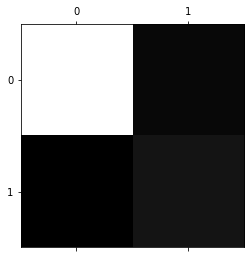

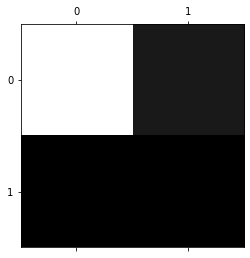

In [31]:

plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.matshow(conf_matrix_dummy, cmap=plt.cm.gray)



### Qe Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).

In [6]:
# TODO: Qe concluding remarks in text..

REVISIONS||
---------||
2018-12-19| CEF, initial.                  
2018-02-07| CEF, updated.           
2018-02-07| CEF, rewritten accuracy paradox section. 
2018-03-05| CEF, updated with SHN comments.
2019-09-01| CEF, updated for ITMAL v2.
2019-09-04| CEF, updated for print-f and added conclusion Q.
2020-01-25| CEF, F20 ITMAL update.
2020-02-03| CEF, minor text fixes.
2020-02-04| CEF, updated page numbers to HOMLv2.
2020-02-17| CEF, added implementation note on denominator=0.
2020-09-03| CEF, E20 ITMAL update, udpated figs paths.
2020-09-06| CEF, added alt text.
2020-09-07| CEF, updated HOML page refs.
2020-09-21| CEF, fixed factor 2 error in beta-harmonic.
2021-01-12| CEF, F21 ITMAL update, moved revision tabel.
2021-08-02| CEF, update to E21 ITMAL.